## When using a local Jupyter Notebook

In [1]:
%cd C:/Users/nashw/Desktop/ACV/

[Errno 2] No such file or directory: 'C:/Users/nashw/Desktop/ACV/'
/home/d5learner-04/Documents/llebreton/ACV


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Show an image (in a window)

In [3]:
def show_image(image):
    cv2.imshow('', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

star_mask = cv2.imread('./day2/data/star_mask.jpg')

show_image(star_mask)

### Watch a webcam or a video and apply a filter

In [4]:
def run_filter_on_video(video_path, image_filter):
    cap = cv2.VideoCapture(video_path)

    while(True):
        # Capture frame-by-frame
        ret, frame = cap.read()
        
        # Our operations on the frame come here
        result_image = image_filter(frame)

        # Display the resulting frame
        cv2.imshow('frame', result_image)

        # We break out of the loop if the 'q' key is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # When everything done, release the capture
    cap.release()
    cv2.destroyAllWindows()

In [5]:
def run_filter_on_camera(image_filter):
    cap = cv2.VideoCapture(0)

    while(True):
        # Capture frame-by-frame
        ret, frame = cap.read()
        
        # Our operations on the frame come here
        result_image = image_filter(frame)

        # Display the resulting frame
        cv2.imshow('frame', result_image)

        # We break out of the loop if the 'q' key is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # When everything done, release the capture
    cap.release()
    cv2.destroyAllWindows()

In [6]:
def black_and_white(image):
    return_image = np.zeros((image.shape[0], image.shape[1], 3), np.uint8)
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    return_image[:, :, 0] = gray
    return_image[:, :, 1] = gray
    return_image[:, :, 2] = gray
    
    return return_image

In [7]:
def sidebyside(imageleft,imageright):
    newimheight = max(imageleft.shape[0],imageright.shape[0])
    newimwidth = imageleft.shape[1] + imageright.shape[1]
    newim = np.zeros((newimheight,newimwidth,3), np.uint8)
    newim[0:imageleft.shape[0],0:imageleft.shape[1]] = imageleft
    newim[0:imageright.shape[0],imageleft.shape[1]:] = imageright
    return newim

def filtre_gray(image):
    femme_gray = image.copy()
    femme_gray[:,:,0] = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    femme_gray[:,:,1] = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    femme_gray[:,:,2] = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    return femme_gray

def sepia(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    normalized_gray = np.array(gray, np.float32)/255
    #solid color
    sepia = np.ones(image.shape)
    sepia[:,:,0] *= 255 #B
    sepia[:,:,1] *= 204 #G
    sepia[:,:,2] *= 153#R
    #hadamard 
    sepia[:,:,0] *= normalized_gray #B
    sepia[:,:,1] *= normalized_gray #G
    sepia[:,:,2] *= normalized_gray #R
    return np.array(sepia, np.uint8)

def effet_miroir(image):
    flipVertical = cv2.flip(image, 1)

    return sidebyside(flipVertical[0:flipVertical[0].shape[0],0:flipVertical.shape[1]//2],image[0:image[0].shape[0],image.shape[1]//2:])

def ajout_texte(image, filtre):
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = image.copy()
    return cv2.putText(img,filtre,(30,175), font, 2, (0, 0, 0), 2, cv2.LINE_AA)

def appel_filtre(image, filtre):
    if filtre == 'none':
        return ajout_texte(image,filtre)
    if filtre == 'gray':
        return ajout_texte(filtre_gray(image),filtre)
    elif filtre == 'miroir':
        return ajout_texte(effet_miroir(image),filtre)
    elif filtre == 'sepia':
        return ajout_texte(sepia(image),filtre)

def quadrillage(image,filtres):
    newimheight = image.shape[0]*3
    newimwidth = image.shape[1]*3
    newim = np.zeros((newimheight,newimwidth,3), np.uint8)
    height = image.shape[0]
    width = image.shape[1]    
    
    for i in range(9):
        newim[(i//3)*height:(i//3+1)*height, (i%3)*width:(i%3+1)*width] = appel_filtre(image, filtres[i])

    return newim

filtres = ['miroir','gray','none','sepia','gray','gray','gray','gray','gray']


In [8]:
def nez_rouge(image):
    return image

In [9]:
#plt.imshow(messi)

In [10]:
run_filter_on_camera(effet_miroir)

In [11]:
run_filter_on_camera(black_and_white)

## Image Transformations

### Resizing

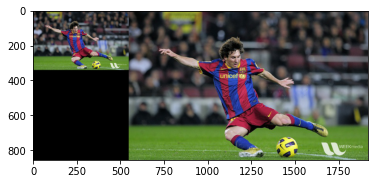

In [12]:
scalefactor=2.5

messi = plt.imread('./day1/data/messi.jpg')

#the heart of the code:
res = cv2.resize(messi ,None,fx=scalefactor, fy=scalefactor, interpolation = cv2.INTER_CUBIC)

#the remainder of the code is to generate the display image
height, width = messi.shape[:2]

bigwidth = int( np.amax( [scalefactor*height , height]) )
bigheight = int( width*(1+scalefactor))

bigim = np.zeros((bigwidth , bigheight ,3), np.uint8)
bigim[:height,:width] = messi

if scalefactor > 1:
    bigim[:,width:] = res
else:
    bigim[: int(scalefactor*height),width:] = res

plt.figure()
plt.imshow(bigim)

### Translation

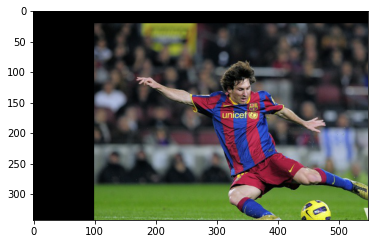

In [13]:
rows,cols,chans = messi.shape
img = messi

xshift=100
yshift=20

M = np.float32([[1,0,xshift],[0,1,yshift]])
dst = cv2.warpAffine(img,M,(cols,rows))

plt.figure()
plt.imshow(dst)

### Rotation

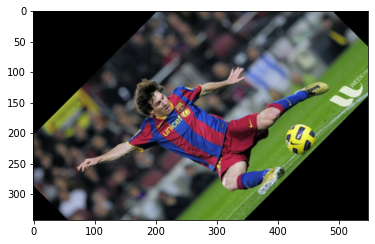

In [14]:
rows, cols, chans = messi.shape

#specify our rotation in degrees
theta = 45.0

M = cv2.getRotationMatrix2D((cols/2,rows/2),theta,1) 
dst = cv2.warpAffine(messi,M,(cols,rows))
                 
plt.figure()
plt.imshow(dst)

### General affine transform

Map 3 input (x,y) points to 3 output points (ie triangle to triangle)

Will perform translation, scaling, rotation, and skew, but not perspective correction

(<AxesSubplot:title={'center':'Output'}>,
 Text(0.5, 1.0, 'Output'))

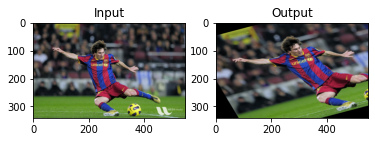

In [15]:
rows,cols,ch = messi.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(messi,M,(cols,rows))

plt.figure()
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')

### Perspective transform

4 point transform

Nonlinear but more general than affine

Perspective:  further away objects look smaller

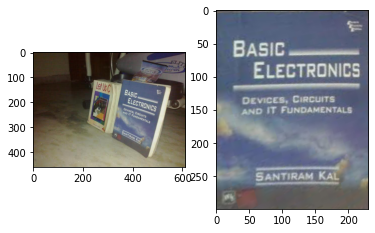

In [16]:
img = plt.imread('day2/data/right.jpg')
rows,cols,chans = img.shape

startpts =  np.float32([[362, 107], [530,139] , [453,416], [319,337]])
endpts   =  np.float32([[100, 100], [330,100],  [330,400], [100,400]])

M = cv2.getPerspectiveTransform(startpts,endpts)

dst = cv2.warpPerspective(img,M,(rows,cols))

plt.figure()

plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(dst[100:400,100:330])

## Mediapipe presentation

In [17]:
import mediapipe as mp
import cv2
import numpy as np
import matplotlib.pyplot as plt

drawing_utils = mp.solutions.drawing_utils
drawing_styles = mp.solutions.drawing_styles

In [18]:
def run_filter_with_mediapipe_model(mediapipe_model, mediapipe_based_filter):
    cap = cv2.VideoCapture(0)
    
    with mediapipe_model as model:
        while cap.isOpened():
            success, image = cap.read()

            if not success:
                print("Ignoring empty camera frame.")
                continue     # If loading a video, use 'break' instead of 'continue'.

            # Flip the image horizontally for a later selfie-view display, and convert
            # the BGR image to RGB.
            image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)

            results = model.process(image)
            
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            result_image = mediapipe_based_filter(image, results)
                     
            cv2.imshow('MediaPipe', result_image)

            if cv2.waitKey(5) & 0xFF == ord('q'):
                break
            
    cap.release()
    cv2.destroyAllWindows()
    
    return image, results

### Holistic (Hands, Face and Pose tracking)

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Holistic = mp.solutions.holistic.Holistic

In [20]:
def draw_holistic_results(image, results, show_hands=True, show_face=True, show_pose=False):
    if show_hands:
        drawing_utils.draw_landmarks(
            image,
            results.left_hand_landmarks,
            mp.solutions.holistic.HAND_CONNECTIONS,
            connection_drawing_spec=drawing_styles.get_default_hand_connections_style()
        )

        drawing_utils.draw_landmarks(
            image,
            results.right_hand_landmarks,
            mp.solutions.holistic.HAND_CONNECTIONS,
            connection_drawing_spec=drawing_styles.get_default_hand_connections_style()
        )

    if show_face:
        drawing_utils.draw_landmarks(
            image,
            results.face_landmarks,
            mp.solutions.holistic.FACEMESH_CONTOURS,
            landmark_drawing_spec=drawing_utils.DrawingSpec(thickness=0, circle_radius=0, color=(255, 255, 255)),
            connection_drawing_spec=drawing_styles.get_default_face_mesh_contours_style()
        )

    if show_pose:
        drawing_utils.draw_landmarks(
            image,
            results.pose_landmarks,
            mp.solutions.holistic.POSE_CONNECTIONS,
            landmark_drawing_spec=drawing_styles.get_default_pose_landmarks_style()
        )
    
    return image

In [21]:
last_image, last_results = run_filter_with_mediapipe_model(
    mediapipe_model=Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5),
    mediapipe_based_filter=draw_holistic_results
)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


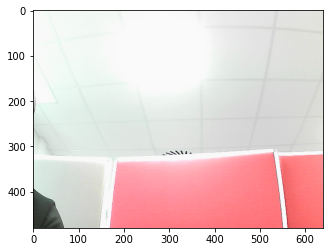

In [22]:
plt.imshow(last_image[:, :, ::-1])

#last_results.face_landmarks.landmark[8]


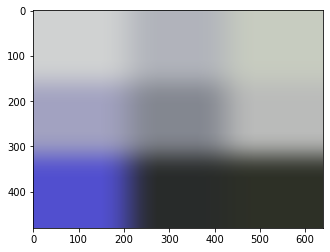

In [74]:
#img = last_image[:, :, ::-1]

plt.imshow(anonymize_face_simple(img))

### Selfie segmentation model

In [27]:
SelfieSegmentation = mp.solutions.selfie_segmentation.SelfieSegmentation

In [28]:
def draw_selfie_segmentation_mask(image, result):
    return result.segmentation_mask

run_filter_with_mediapipe_model(
    mediapipe_model=SelfieSegmentation(model_selection=0),
    mediapipe_based_filter=draw_selfie_segmentation_mask
)

(array([[[208, 217, 195],
         [208, 217, 195],
         [205, 215, 193],
         ...,
         [170, 170, 170],
         [175, 175, 175],
         [176, 176, 176]],
 
        [[206, 215, 196],
         [206, 215, 196],
         [205, 215, 193],
         ...,
         [172, 172, 172],
         [170, 170, 170],
         [171, 171, 171]],
 
        [[210, 218, 201],
         [209, 217, 200],
         [209, 218, 198],
         ...,
         [177, 177, 177],
         [176, 176, 176],
         [176, 176, 176]],
 
        ...,
 
        [[ 12,  16,  11],
         [ 15,  19,  14],
         [ 14,  17,  15],
         ...,
         [ 55,  61, 190],
         [ 61,  58, 189],
         [ 61,  58, 189]],
 
        [[ 10,  17,  16],
         [  6,  13,  12],
         [ 20,  20,  20],
         ...,
         [ 53,  60, 189],
         [ 50,  56, 194],
         [ 44,  50, 188]],
 
        [[ 17,  24,  16],
         [ 13,  21,  13],
         [ 11,  18,  12],
         ...,
         [ 57,  63, 194],
  

In [3]:
import cv2
import matplotlib.pyplot as plt


def run_filter_with_mediapipe_model():
    cap = cv2.VideoCapture(0)
    if not cap:
        print("!!! Failed VideoCapture: invalid parameter!")

    while(True):
        # Capture frame-by-frame
        ret, current_frame = cap.read()
        if type(current_frame) == type(None):
            print("!!! Couldn't read frame!")
            break

        # Display the resulting frame
        cv2.imshow('frame',current_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # release the capture
    cap.release()
    cv2.destroyAllWindows()
    return current_frame

In [4]:
img = run_filter_with_mediapipe_model()

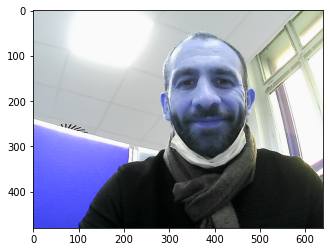

In [5]:
plt.imshow(img)

In [96]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

# For static images:
#IMAGE_FILES = [img]
#drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
with mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5) as face_mesh:
    #for idx, file in enumerate(IMAGE_FILES):
        #image = cv2.imread(img)
        # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [143]:
results.multi_face_landmarks[0].landmark[1]

x: 0.6700738668441772
y: 0.347334086894989
z: -0.0010249321348965168

In [267]:
max_x = int(max([i.x for i in results.multi_face_landmarks[0].landmark]) * img.shape[1])
min_x = int(min([i.x for i in results.multi_face_landmarks[0].landmark]) * img.shape[1])

max_y = int(max([i.y for i in results.multi_face_landmarks[0].landmark]) * img.shape[0])
min_y = int(min([i.y for i in results.multi_face_landmarks[0].landmark]) * img.shape[0])

In [268]:
img_test = img[min_y:max_y,min_x:max_x,:].copy()

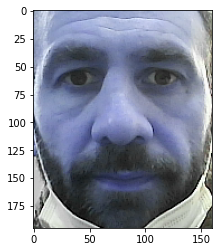

In [269]:
plt.imshow(img_test)

In [144]:
img.shape

(480, 640, 3)

In [169]:
x = int(results.multi_face_landmarks[0].landmark[332].x * img.shape[1])
y = int(results.multi_face_landmarks[0].landmark[332].y * img.shape[0])

In [207]:
x_1 = int(results.multi_face_landmarks[0].landmark[54].x * img.shape[1])
y_1 = int(results.multi_face_landmarks[0].landmark[54].y * img.shape[0])

x_2 = int(results.multi_face_landmarks[0].landmark[284].x * img.shape[1])
y_2 = int(results.multi_face_landmarks[0].landmark[284].y * img.shape[0])

x_4 = int(results.multi_face_landmarks[0].landmark[349].x * img.shape[1])
y_4 = int(results.multi_face_landmarks[0].landmark[349].y * img.shape[0])

In [208]:
results.multi_face_landmarks[0].landmark[332]

x: 0.7091135382652283
y: 0.2532121241092682
z: 0.013818701729178429

In [216]:
img_2 = img.copy()
img_2[y_2:y_4,x_1:x_2,:] = 0

In [221]:
img_3 = img[y_2:y_4,x_1:x_2,:].copy()

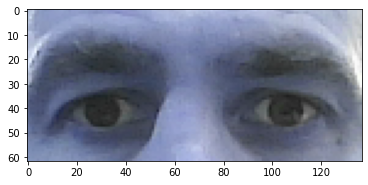

In [222]:
plt.imshow(img_3)

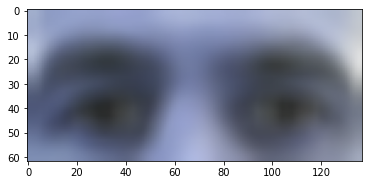

In [227]:
# ksize
ksize = (10, 10)
  
# Using cv2.blur() method 
image_blur = cv2.blur(img_3, ksize) 
  
plt.imshow(image) 

In [228]:
img_2[y_2:y_4,x_1:x_2,:] = image_blur

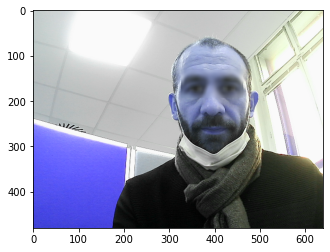

In [229]:
plt.imshow(img_2) 

In [215]:
img_2[0,0,0]

178

In [118]:
x

295

In [3]:
import cv2
import matplotlib.pyplot as plt


def run_filter_with_mediapipe_model():
    cap = cv2.VideoCapture(0)
    if not cap:
        print("!!! Failed VideoCapture: invalid parameter!")

    while(True):
        # Capture frame-by-frame
        ret, current_frame = cap.read()
        if type(current_frame) == type(None):
            print("!!! Couldn't read frame!")
            break

        # Display the resulting frame
        cv2.imshow('frame',current_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # release the capture
    cap.release()
    cv2.destroyAllWindows()
    return current_frame

In [ ]:
img = run_filter_with_mediapipe_model()

In [14]:
import cv2
import mediapipe as mp
mp_face_mesh = mp.solutions.face_mesh

def blurring_face(img):
    # ksize
    ksize = (25, 25)
    img_blur = img.copy()
    
    with mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=3, min_detection_confidence=0.5) as face_mesh:
        results = face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        if results.multi_face_landmarks:    
            for face in results.multi_face_landmarks :
                max_x = int(max([i.x for i in face.landmark]) * img.shape[1])
                min_x = int(min([i.x for i in face.landmark]) * img.shape[1])

                max_y = int(max([i.y for i in face.landmark]) * img.shape[0])
                min_y = int(min([i.y for i in face.landmark]) * img.shape[0])

                if max_x < img.shape[1] and min_x > 0 and max_y < img.shape[0] and min_y > 0:

                    #img_blur[min_y:max_y,min_x:max_x,:] = cv2.blur(img_blur[min_y:max_y,min_x:max_x,:], ksize, cv2.BORDER_DEFAULT)
                    img_blur[min_y:max_y,min_x:max_x,:] = cv2.GaussianBlur(img_blur[min_y:max_y,min_x:max_x,:], ksize , 50)
                
    return img_blur 

In [15]:
#blurring_face(img)

In [16]:
import cv2
import matplotlib.pyplot as plt


def run_filter_with_mediapipe_model():
    cap = cv2.VideoCapture(0)
    if not cap:
        print("!!! Failed VideoCapture: invalid parameter!")

    while(True):
        # Capture frame-by-frame
        ret, current_frame = cap.read()
        if type(current_frame) == type(None):
            print("!!! Couldn't read frame!")
            break
        
        aff = blurring_face(current_frame)
        # Display the resulting frame
        cv2.imshow('frame',aff)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # release the capture
    cap.release()
    cv2.destroyAllWindows()

In [17]:
run_filter_with_mediapipe_model()

In [8]:
import cv2
import numpy as np
import math
import mediapipe as mp

mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

def get_face_landmarks(img):
   
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(img)  
    return results

def compute_angle(point1, point2):
    
    x1, y1, x2, y2 = point1[0], point1[1], point2[0], point2[1]
    angle = -180/math.pi * math.atan(float(y2-y1)/float(x2-x1))
    
    return angle


def lens_filter(img, png_fname):
    
    results = get_face_landmarks(img)
    doggy_ears = cv2.imread(png_fname)
    new_img = img.copy()
    
    if results.multi_face_landmarks:
        
        max_x = int(max([i.x for i in results.multi_face_landmarks[0].landmark]) * img.shape[1])
        min_x = int(min([i.x for i in results.multi_face_landmarks[0].landmark]) * img.shape[1])

        max_y = int(max([i.y for i in results.multi_face_landmarks[0].landmark]) * img.shape[0])
        min_y = int(min([i.y for i in results.multi_face_landmarks[0].landmark]) * img.shape[0])
        
        face_landmarks = results.multi_face_landmarks[0].landmark
        
        dog_h, dog_w = doggy_ears.shape[:2]
        
        face_pin_1 = face_landmarks[332]
        face_pin_2 = face_landmarks[103]
        
        angle = compute_angle((face_pin_1.x,face_pin_1.y),(face_pin_2.x,face_pin_2.y))
        
        M = cv2.getRotationMatrix2D((dog_w/2, dog_h/2), angle, 1)
        doggy_ears = cv2.warpAffine(doggy_ears, M, (dog_w, dog_h))
        
        #face_right = face_landmarks[454]
        #face_left = face_landmarks[234]
        face_right = (min_x, min_y)
        face_left = (max_x, max_y)
        
        #face_w = math.sqrt((face_right.x - face_left.x)**2 + (face_right.y - face_left.y)**2)
        face_w = math.sqrt((face_right[0] - face_left[0])**2 + (face_right[0] - face_left[1])**2)
        
        img_h, img_w = img.shape[:2]
        ratio = (face_w*img_w) / dog_w
        
        doggy_ears = cv2.resize(doggy_ears, (int(ratio*dog_w), int(ratio*dog_h)))
        
        print(ratio)
        
    return doggy_ears

def shapening(img):
    kernel = np.array([[-1, -1, -1], [-1, 10, -1], [-1, -1, -1]])
    img_sharpen = cv2.filter2D(img, -1, kernel)
    return img_sharpen

def draw_face_landmarks(img):
    results = get_face_landmarks(img)
    new_img = img.copy()
    
    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            mp_drawing.draw_landmarks(image = new_img, 
                                      landmark_list = face_landmarks, 
                                      connections = mp_face_mesh.FACEMESH_TESSELATION,
                                      landmark_drawing_spec = None, 
                                      connection_drawing_spec = mp_drawing_styles
                                      .get_default_face_mesh_tesselation_style())
    return new_img


cam = cv2.VideoCapture(0)

with mp_face_mesh.FaceMesh(max_num_faces = 1,
                          min_detection_confidence = 0.5,
                          min_tracking_confidence = 0.5) as face_mesh:
    

    while cam.isOpened():
        _, frame = cam.read()
        frame = cv2.flip(frame, 1)

        cv2.imshow('webcam',frame)
        cv2.imshow('Doggy ears', lens_filter(frame,'./doggy_ears.png'))
        #cv2.imshow('Sharpen',shapening(frame))  
        cv2.imshow('Face Landmarks',draw_face_landmarks(frame))    

        
        #27 = Echap
        if cv2.waitKey(1) == 27 :
            break

    cam.release()
    cv2.destroyAllWindows()

AttributeError: 'tuple' object has no attribute 'x'